In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\pawan\anaconda3\envs\dataanalysispython\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US = df[df['job_country'] == 'United States'].copy()

df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [ ]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

df_US

In [ ]:
pivot= pd.pivot_table(df_US, index= 'job_posted_month', columns='job_title_short', aggfunc='count')

pivot

In [ ]:
pivot.reset_index(inplace=True)
pivot['month number'] = pd.to_datetime(pivot['job_posted_month'], format= '%B').dt.month
pivot

In [ ]:
pivot.sort_values('month number', inplace=True)
pivot.set_index('job_posted_month', inplace=True)
pivot.drop(columns='month number', inplace=True)


pivot


In [29]:
top_3= df_US['job_title_short'].value_counts().head(3)
print(top_3)
top_3= top_3.index.tolist()

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Step 1: Define top 3 job roles
top_3 = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Step 2: Create a new DataFrame with summed columns
plot_df = pd.DataFrame(index=pivot.index)

for role in top_3:
    # Select all columns related to this role
    role_cols = [col for col in pivot.columns if role in col]
    
    # Sum across those columns per month
    plot_df[role] = pivot[role_cols].sum(axis=1)

# Step 3: Plot the final 3 clean lines
plot_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Job Postings for Top 3 Data Jobs')
plt.xlabel('Month')
plt.ylabel('Number of Postings')
plt.grid(True)
plt.legend(title='Job Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
pivot_software_jobs= pd.read_csv("https://lukeb.co/software_csv", index_col= 'job_posted_month')

In [32]:
pivot_software_jobs

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [34]:
df_US_merged= pivot.merge(pivot_software_jobs, on='job_posted_month', )
df_US_merged

,company_name Business Analyst,company_name Cloud Engineer,company_name Data Analyst,company_name Data Engineer,company_name Data Scientist,company_name Machine Learning Engineer,company_name Senior Data Analyst,company_name Senior Data Engineer,company_name Senior Data Scientist,company_name Software Engineer,...,search_location Data Scientist,search_location Machine Learning Engineer,search_location Senior Data Analyst,search_location Senior Data Engineer,search_location Senior Data Scientist,search_location Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,...,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,...,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,...,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,...,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,...,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,...,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,...,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,...,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,...,4568,113,805,775,1014,228,14016,8447,6139,4094


In [39]:
top_5= df_US_merged.sum()

top_5 = top_5.sort_values(ascending=False).head(5)
top_5 = top_5.index.tolist()

In [40]:
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'company_name Data Analyst',
 'search_location Data Analyst']

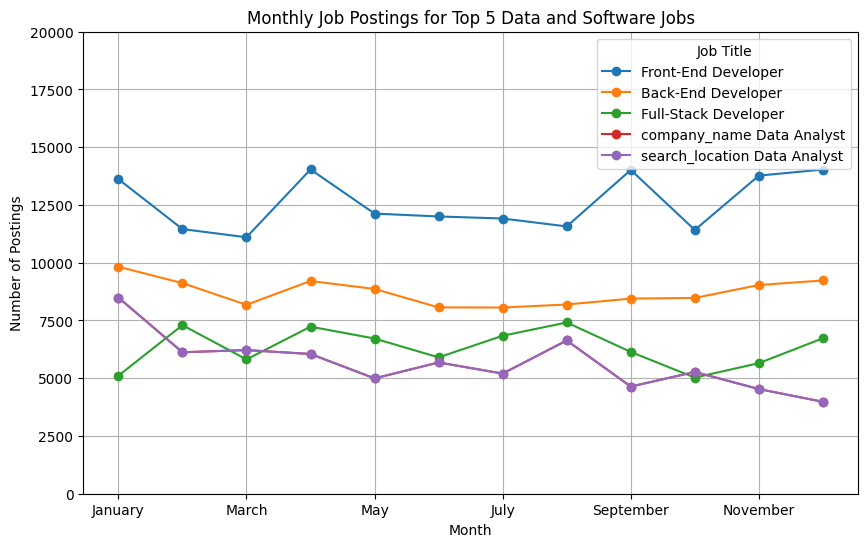

In [41]:
df_US_merged[top_5].plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Job Postings for Top 5 Data and Software Jobs')
plt.xlabel('Month')
plt.ylabel('Number of Postings')
plt.grid(True)
plt.ylim(0, 20000)
plt.legend(title='Job Title')


In [ ]:
df_ind = df[df['job_country'] == 'India'].copy()

df_ind

In [ ]:
df_ind['job_posted_month'] = df_ind['job_posted_date'].dt.strftime('%B')
df_ind

In [ ]:
df_ind_pivot = df_ind.pivot_table(index= 'job_posted_month', columns= 'job_title_short', aggfunc='size')


In [ ]:
df_ind_pivot.reset_index(inplace=True)
df_ind_pivot['month_no'] = pd.to_datetime(df_ind_pivot['job_posted_month'], format='%B').dt.month

df_ind_pivot.sort_values(by='month_no')

In [20]:
df_ind_pivot = df_ind_pivot.sort_values(by='month_no')
df_ind_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,175,31,628,2132,1444,70,127,448,269,192,1
3,February,143,35,433,1631,932,42,94,313,165,157,2
7,March,116,37,422,1591,1005,34,96,351,194,180,3
0,April,170,32,418,1566,946,54,86,375,194,169,4
8,May,103,14,278,1384,837,31,59,329,134,98,5
6,June,146,26,367,1632,1129,41,66,427,238,125,6
5,July,142,25,457,1528,1123,54,75,359,204,155,7
1,August,189,25,618,1407,1157,47,126,343,235,148,8
11,September,155,34,630,1508,984,67,85,324,195,132,9
10,October,170,36,500,1476,902,85,67,318,180,167,10


In [21]:
df_ind_pivot.set_index('job_posted_month', inplace=True)
df_ind_pivot.drop(columns='month_no', inplace=True) 
df_ind_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


Text(0.5, 1.0, 'Monthly Job Postings in India')

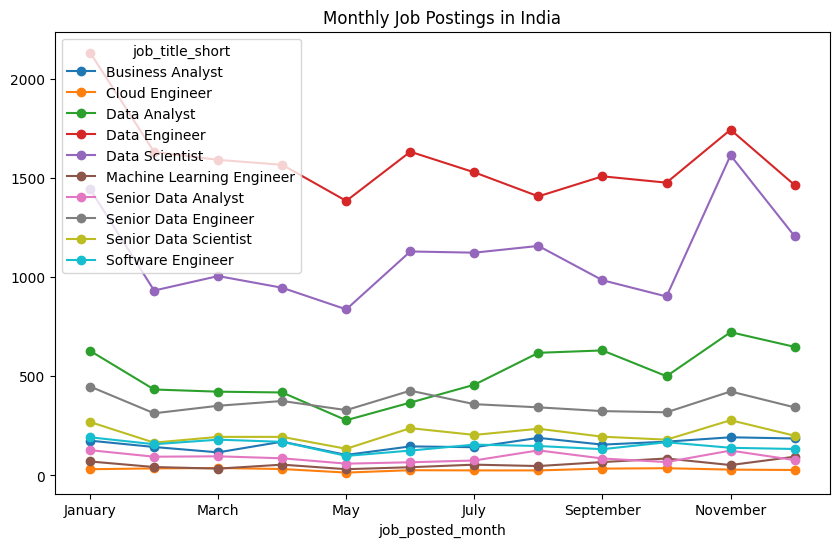

In [22]:
df_ind_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Job Postings in India')

In [28]:
top_3_ind = df_ind['job_title_short'].value_counts().head(3)
print(top_3_ind)

top_3_ind = top_3_ind.index.tolist()
top_3_ind

job_title_short
Data Engineer     19062
Data Scientist    13279
Data Analyst       6121
Name: count, dtype: int64


['Data Engineer', 'Data Scientist', 'Data Analyst']

<Axes: xlabel='job_posted_month'>

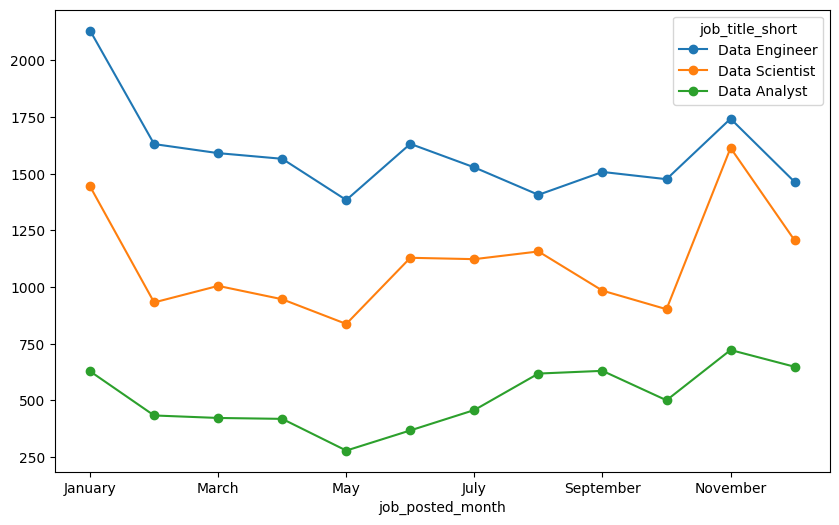

In [27]:
df_ind_pivot[top_3_ind].plot(kind='line', marker='o', figsize=(10, 6))